# `plot_extrema_labels`

This notebook is a simple example of the GeoCAT-viz function <a href="../user_api/generated/geocat.viz.util.plot_extrema_labels.html#geocat-viz.util.plot_extrema_labels">plot_extrema_labels</a>.

In [6]:
# Import packages:

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as mticker

import geocat.datafiles as gdf
import geocat.viz as gv

In [7]:
# Read in data:

# Open a netCDF data file using xarray default engine and
# load the data into xarrays
ds = xr.open_dataset(gdf.get("netcdf_files/slp.1963.nc"), decode_times=False)

# Get data from the 21st timestep
pressure = ds.slp[21, :, :]

# Translate float values to short values
pressure = pressure.astype('float32')

# Convert Pa to hPa data
pressure = pressure * 0.01

# Fix the artifact of not-shown-data around 0 and 360-degree longitudes
wrap_pressure = gv.xr_add_cyclic_longitudes(pressure, "lon")

posx and posy should be finite values
posx and posy should be finite values


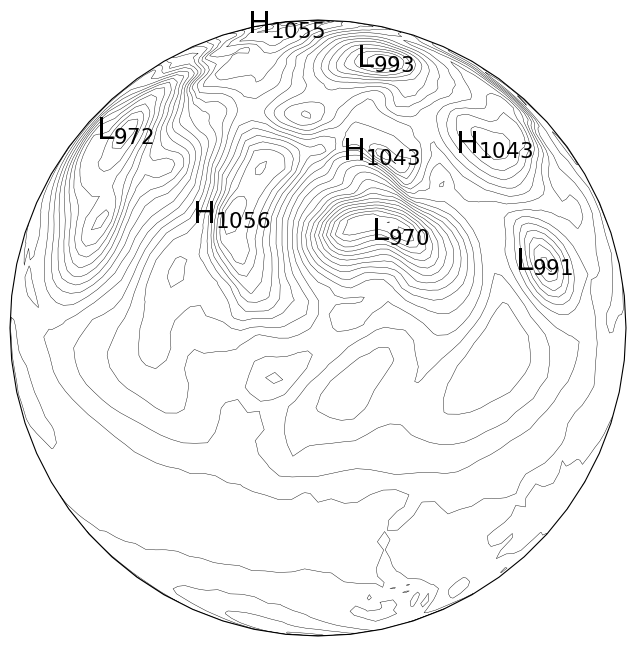

In [8]:
# Create plot

# Set figure size
fig = plt.figure(figsize=(8, 8))

# Set global axes with an orthographic projection
proj = ccrs.Orthographic(central_longitude=270, central_latitude=45)
ax = plt.axes(projection=proj)
ax.set_global()

# Plot contour data
p = wrap_pressure.plot.contour(ax=ax,
                               transform=ccrs.PlateCarree(),
                               linewidths=0.3,
                               levels=30,
                               cmap='black',
                               add_labels=False)

# low pressure contour levels- these will be plotted
# as a subscript to an 'L' symbol.
lowClevels = gv.find_local_extrema(pressure, lowVal=995, eType='Low')
highClevels = gv.find_local_extrema(pressure, highVal=1042, eType='High')

# Label low and high contours
gv.plot_extrema_labels(wrap_pressure,
                       ccrs.Geodetic(),
                       proj,
                       label_locations=lowClevels,
                       label='L')
gv.plot_extrema_labels(wrap_pressure,
                       ccrs.Geodetic(),
                       proj,
                       label_locations=highClevels,
                       label='H')


plt.show();